In [1]:
function newton(x0,f,g) #es la funcion para calcular el método de newton
    t=[]
    u=[]
    r=[]
    suma=0
    J=f(x0)  #evaluo si x0 no es la raiz
    error=abs(J) #Y llamaré al primer error, lo que se separe f(x0) del 0.
        while error>0.0000001 #mientras el error sea mayor a la tolerancia dada, entrará al loop.
        suma=suma+1 #me dirá cuantas veces entró al ciclo, esto para ir graficando como con cada ciclo, se va acercando a 0
        F=f(x0) #evaluo x0 en f
        G=g(x0) #evaluo x0 en g
        push!(r,suma) 
        push!(t,F)
        push!(u,x0)
        x1=x0-(F/G) #x1 es la aproximación de la raiz a partir de x0
        error=abs(f(x1)) #recalculo el error, ahora apartir de la distancia entra las aproximaciones x1 y x0 de la raiz
        x0=x1 #redefino x0 ahora como x1 por si necesito entrar al loop
     #   println(x0) #imprime todas las x1 calculadas
    end
    println(u)
    println(t)
    println(x0) #devuelve x0

xs = linspace(0,1.2,20) #imprime la funcion en cada ciclo
scatter(u, t, color="red")
    
xs = linspace(0,1.2,20) #imprime como se va acercando a 0 la raiz.
    scatter(r,t,color="silver")
end

newton (generic function with 1 method)

In [2]:

    g(x) = (3*x^2)-(2*x)-1

g (generic function with 1 method)

In [3]:
    f(x) = x^3-x^2-x-1


f (generic function with 1 method)

In [4]:
using PyPlot

Any[2, 1

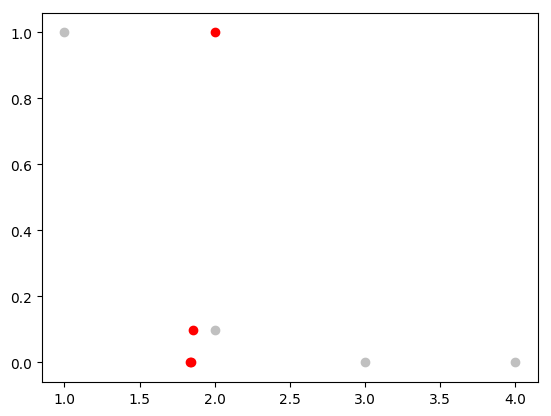

.85714, 1.83954, 1.83929]
Any[1, 0.0991254, 0.00141033, 3.0007e-7]
1.8392867552141636


In [5]:
newton(2,f,g)

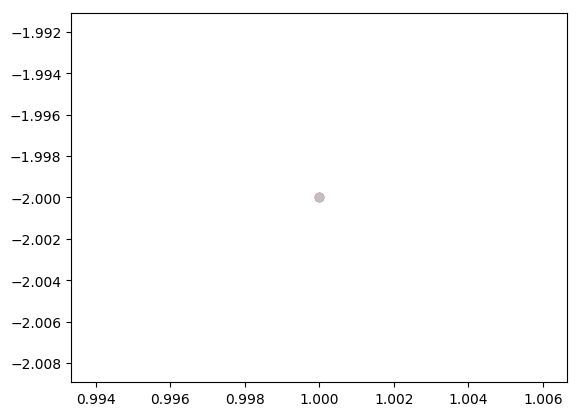

Any[1]
Any[-2]
Inf


PyObject <matplotlib.collections.PathCollection object at 0x7f82ae572350>

In [6]:
newton(1,f,g)

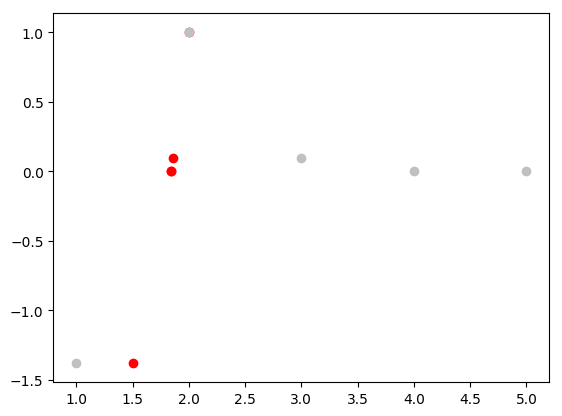

Any[1.5, 2.0, 1.85714, 1.83954, 1.83929]
Any[-1.375, 1.0, 0.0991254, 0.00141033, 3.0007e-7]
1.8392867552141636


PyObject <matplotlib.collections.PathCollection object at 0x7f82ae4c3790>

In [7]:
newton(1.5,f,g)

Hacer la misma función pero que en lugar de tomar como argumento una condición inicial, tome un rango amplio de condiciones iniciales, por ejemplo costruido con linspace. Es muy probable que funcione llamando la funcion que crearon como metodo_newton.(f,df,x). Si no funciona la sintaxis creen una rutina solo para vectores, que seria lo previo al siguiente punto. El ouput debe ser un arreglo donde las entradas son raices, no importa que estén repetidas. Nota: Las funciones se pasan a la rutina SIN argumento, es decir solo como (por ej.) metodo(f).

In [13]:
function newtonlinspace(f::Function,g::Function,x0) #es la funcion para calcular el método de newton
    J=f(x0)
    error=abs(J) #Y llamaré al primer error, lo que se separe f(x0) del 0.
        while error>0.0000001 #mientras el error sea mayor a la tolerancia dada, entrará al loop.
        F=f(x0) #evaluo x0 en f
        G=g(x0) #evaluo x0 en g
        x1=x0-(F/G) #x1 es la aproximación de la raiz a partir de x0
        error=abs(f(x1)) #recalculo el error, ahora apartir de la distancia entra las aproximaciones x1 y x0 de la raiz
        x0=x1 #redefino x0 ahora como x1 por si necesito entrar al loop
    end
x0
end

newtonlinspace (generic function with 1 method)

In [14]:
h(x)= x^3-x^2-x-1

h (generic function with 1 method)

In [15]:
i(x) = (3*x^2)-(2*x)-1

i (generic function with 1 method)

In [16]:
u=linspace(1,5,21)

1.0:0.2:5.0

In [17]:
newtonlinspace.(h,i,u)

21-element Array{Float64,1}:
 Inf      
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929

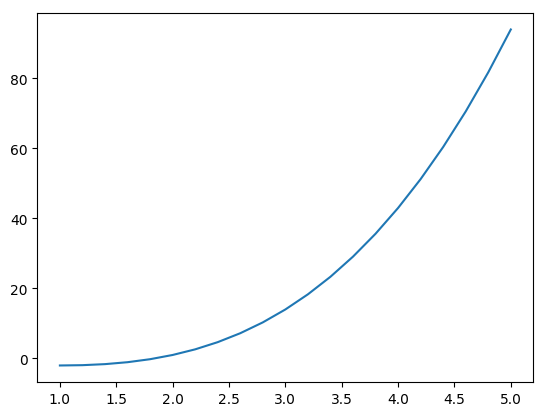

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f82aa914b90>

In [19]:
x=u
y = (x.^3-x.^2-x-1)

plot(x,y)

Crear la misma rutina, pero que esta vez solo reciba un rango amplio de condiciones iniciales (objetos linspace) y que revise el arreglo despues de  200+iteraciones y solo tome las raices diferentes hasta cierto  ϵϵ . Aquí pueden usar push! para ir guardando las raíces en un vector inicializado como (por ej.) t=[]. El output tiene que ser precisamente t.

In [61]:
function newtonlinspace2(f::Function,g::Function,x0) #es la funcion para calcular el método de newton
    t=[]
    J=f(x0)
    diferencia=1
    error=abs(J) #Y llamaré al primer error, lo que se separe f(x0) del 0.
        while error>0.001 && diferencia>0.001 #mientras el error sea mayor a la tolerancia dada, entrará al loop.
        F=f(x0) #evaluo x0 en f
        G=g(x0) #evaluo x0 en g
        x1=x0-(F/G) #x1 es la aproximación de la raiz a partir de x0
        error=abs(f(x1)) #recalculo el error, ahora apartir de la distancia entra las aproximaciones x1 y x0 de la raiz
        diferencia=abs(x1-x0)
        x0=x1 #redefino x0 ahora como x1 por si necesito entrar al loop
    end
push!(t,x0)
end

newtonlinspace2 (generic function with 1 method)

In [62]:
v=linspace(1,5,11)

1.0:0.4:5.0

In [63]:
newtonlinspace2.(h,i,v)

11-element Array{Array{Any,1},1}:
 Any[Inf]    
 Any[1.8393] 
 Any[1.83929]
 Any[1.8393] 
 Any[1.83929]
 Any[1.83936]
 Any[1.83929]
 Any[1.8393] 
 Any[1.83937]
 Any[1.83929]
 Any[1.83929]

In [64]:
function newtonlinspace21(f::Function,g::Function,x0) #es la funcion para calcular el método de newton
    t=[]
    J=f(x0)
    diferencia=1
    error=abs(J) #Y llamaré al primer error, lo que se separe f(x0) del 0.
        while error>0.000001 && diferencia>0.000001 #mientras el error sea mayor a la tolerancia dada, entrará al loop.
        F=f(x0) #evaluo x0 en f
        G=g(x0) #evaluo x0 en g
        x1=x0-(F/G) #x1 es la aproximación de la raiz a partir de x0
        error=abs(f(x1)) #recalculo el error, ahora apartir de la distancia entra las aproximaciones x1 y x0 de la raiz
        diferencia=abs(x1-x0)
        x0=x1 #redefino x0 ahora como x1 por si necesito entrar al loop
    end
push!(t,x0)
end

newtonlinspace21 (generic function with 1 method)

In [65]:
w=linspace(1,10,201)

1.0:0.045:10.0

In [66]:
newtonlinspace21.(h,i,w)

201-element Array{Array{Any,1},1}:
 Any[Inf]    
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]
 ⋮           
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]
 Any[1.83929]

(Lean bien este paso!) Finalmente, desarrollen una función similar a la anterior, siguiendo los mismos pasos, pero esta vez que los inputs de la función del método sean solamente la función y la condición inicial.
Para esto deberán usar lo que aprendimos de SymPy y como podemos convertir y/o evaluar funciones tanto en simbolos como en flotantes.
La función que reciba esta rutina debe ser de Julia, para la derivada pueden usar SymPy internamente, recuerden que es facil convertir funciones de Julia en funciones simbolicas evaluandolas en variables simbolicas; para regresarlas a funciones de Julia e iterarlas, consulten la parte donde vimos la función lambdify.

In [67]:
function ultimo4b(f,x0)
    x = Sym("x")
    error = 1
    u = x0
    df = diff(f(x),x)
    d = lambdify(df,[x]) #La funcion lambdify reescribe lo de Sympy para que julia lo entienda
        while error > 0.000001
        v = u - (f(u)/d(u))
        error = abs(v-u)
        u = v
        end
    u
end

ultimo4b (generic function with 1 method)

In [69]:
Pkg.add("SymPy")

using SymPy

INFO: Initializing package repository /home/juser/.julia/v0.6
INFO: Cloning METADATA from https://github.com/JuliaLang/METADATA.jl
INFO: Cloning cache of BaseTestNext from https://github.com/JuliaCI/BaseTestNext.jl.git
INFO: Cloning cache of BinDeps from https://github.com/JuliaLang/BinDeps.jl.git
INFO: Cloning cache of Compat from https://github.com/JuliaLang/Compat.jl.git
INFO: Cloning cache of Conda from https://github.com/JuliaPy/Conda.jl.git
INFO: Cloning cache of JSON from https://github.com/JuliaIO/JSON.jl.git
INFO: Cloning cache of MacroTools from https://github.com/MikeInnes/MacroTools.jl.git
INFO: Cloning cache of PyCall from https://github.com/JuliaPy/PyCall.jl.git
INFO: Cloning cache of RecipesBase from https://github.com/JuliaPlots/RecipesBase.jl.git
INFO: Cloning cache of SHA from https://github.com/staticfloat/SHA.jl.git
INFO: Cloning cache of SymPy from https://github.com/JuliaPy/SymPy.jl.git
INFO: Cloning cache of URIParser from https://github.com/JuliaWeb/URIParser.jl

In [71]:
function last4b(f,x0)
    x = Sym("x")
    error = 1
    u = x0
    df = diff(f(x),x)
    d = lambdify(df,[x]) #La funcion lambdify reescribe lo de Sympy para que julia lo entienda
        while error > 0.000001
        v = u - (f(u)/d(u))
        error = abs(v-u)
        u = v
        end
    u
end

last4b (generic function with 1 method)

In [72]:
last4b(h,5)

1.8392867552141612